<a href="https://colab.research.google.com/github/kimmingyeol31/2024-1-my-BDA/blob/main/inclass/Week06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import sys

In [5]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.2 MB/s eta 0:00:00


In [1]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.37 MiB/s, done.


In [4]:
import pandas as pd
exam = pd.read_csv("data/exam.csv")
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


## 07 데이터 정제 - 빠진 데이터, 이상한 데이터 제거하기

In [8]:
df = pd.DataFrame({
    'sex': ['M', 'F', np.nan, 'M', 'F'],
    'score': [5, 4, 3, 5, None]
})

df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,5.0
4,F,NaN


In [9]:
df.score + 1

0    6.0
1    5.0
2    4.0
3    6.0
4    NaN
Name: score, dtype: float64

#### 결측치 확인하기

In [10]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [11]:
df.isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [12]:
df.isnull()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [13]:
df.notna()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [14]:
df.notnull()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [15]:
df.isna().sum()

sex      1
score    1
dtype: int64

In [16]:
df.isna().sum(axis=1)

0    0
1    0
2    1
3    0
4    1
dtype: int64

In [17]:
s = pd.Series([True, False, True, False])
s

0     True
1    False
2     True
3    False
dtype: bool

In [18]:
s.sum()

2

In [19]:
s.any() # 하나만 True면 출력이 True

True

In [20]:
s.all() # 모두가 True여야 출력이 True

False

In [21]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,5.0
4,F,NaN


In [27]:
df.isna().any(axis=0)

sex      True
score    True
dtype: bool

In [30]:
b = df.isna().any(axis=1)
b

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [31]:
df[b]

,sex,score
2,NaN,3.0
4,F,NaN


In [35]:
# nan이 적어도 하나 이상 존재하는 행 추출
df[df.isna().any(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,5.0
4,F,NaN


In [42]:
# nan이 하나도 없는 행 추출
df[~df.isna().any(axis=1)] # 매우 중요

,sex,score
0,M,5.0
1,F,4.0
3,M,5.0


In [43]:
df[df.notna().all(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,5.0


#### 결측값 시각화
- [패키지 missingno](https://github.com/ResidentMario/missingno)

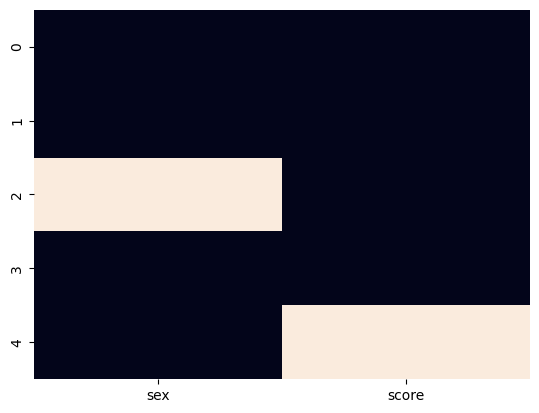

In [50]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False);

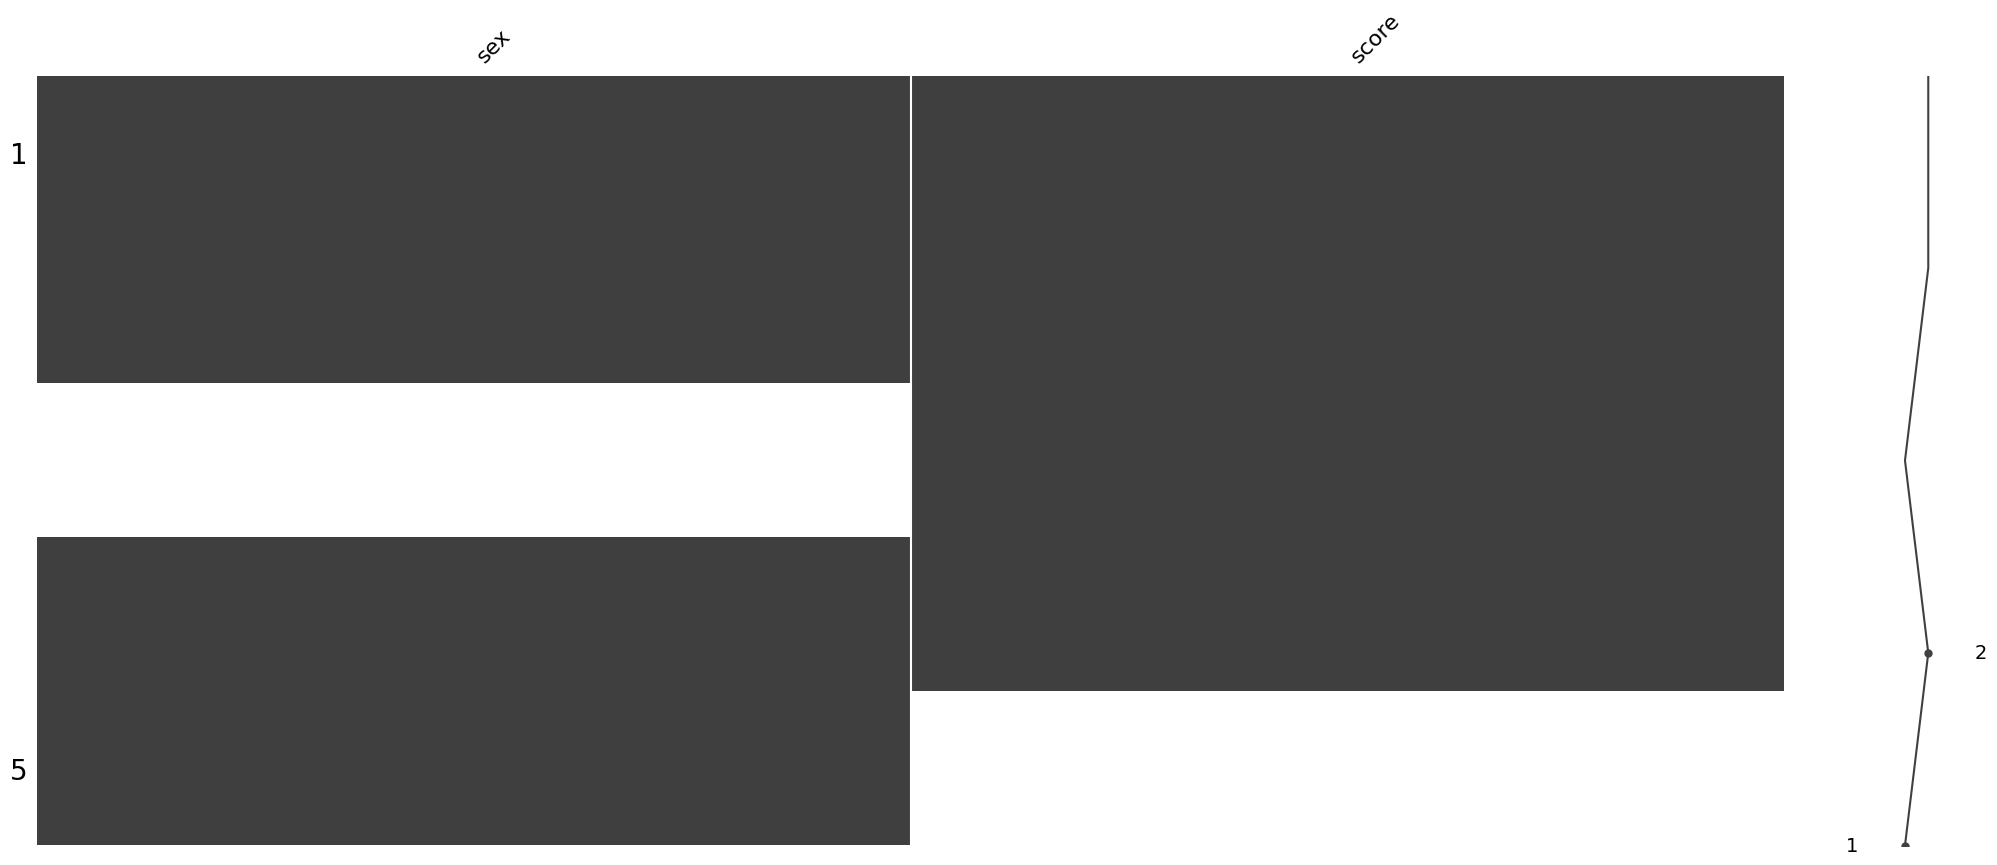

In [53]:
import missingno as msno
msno.matrix(df);

<Axes: >

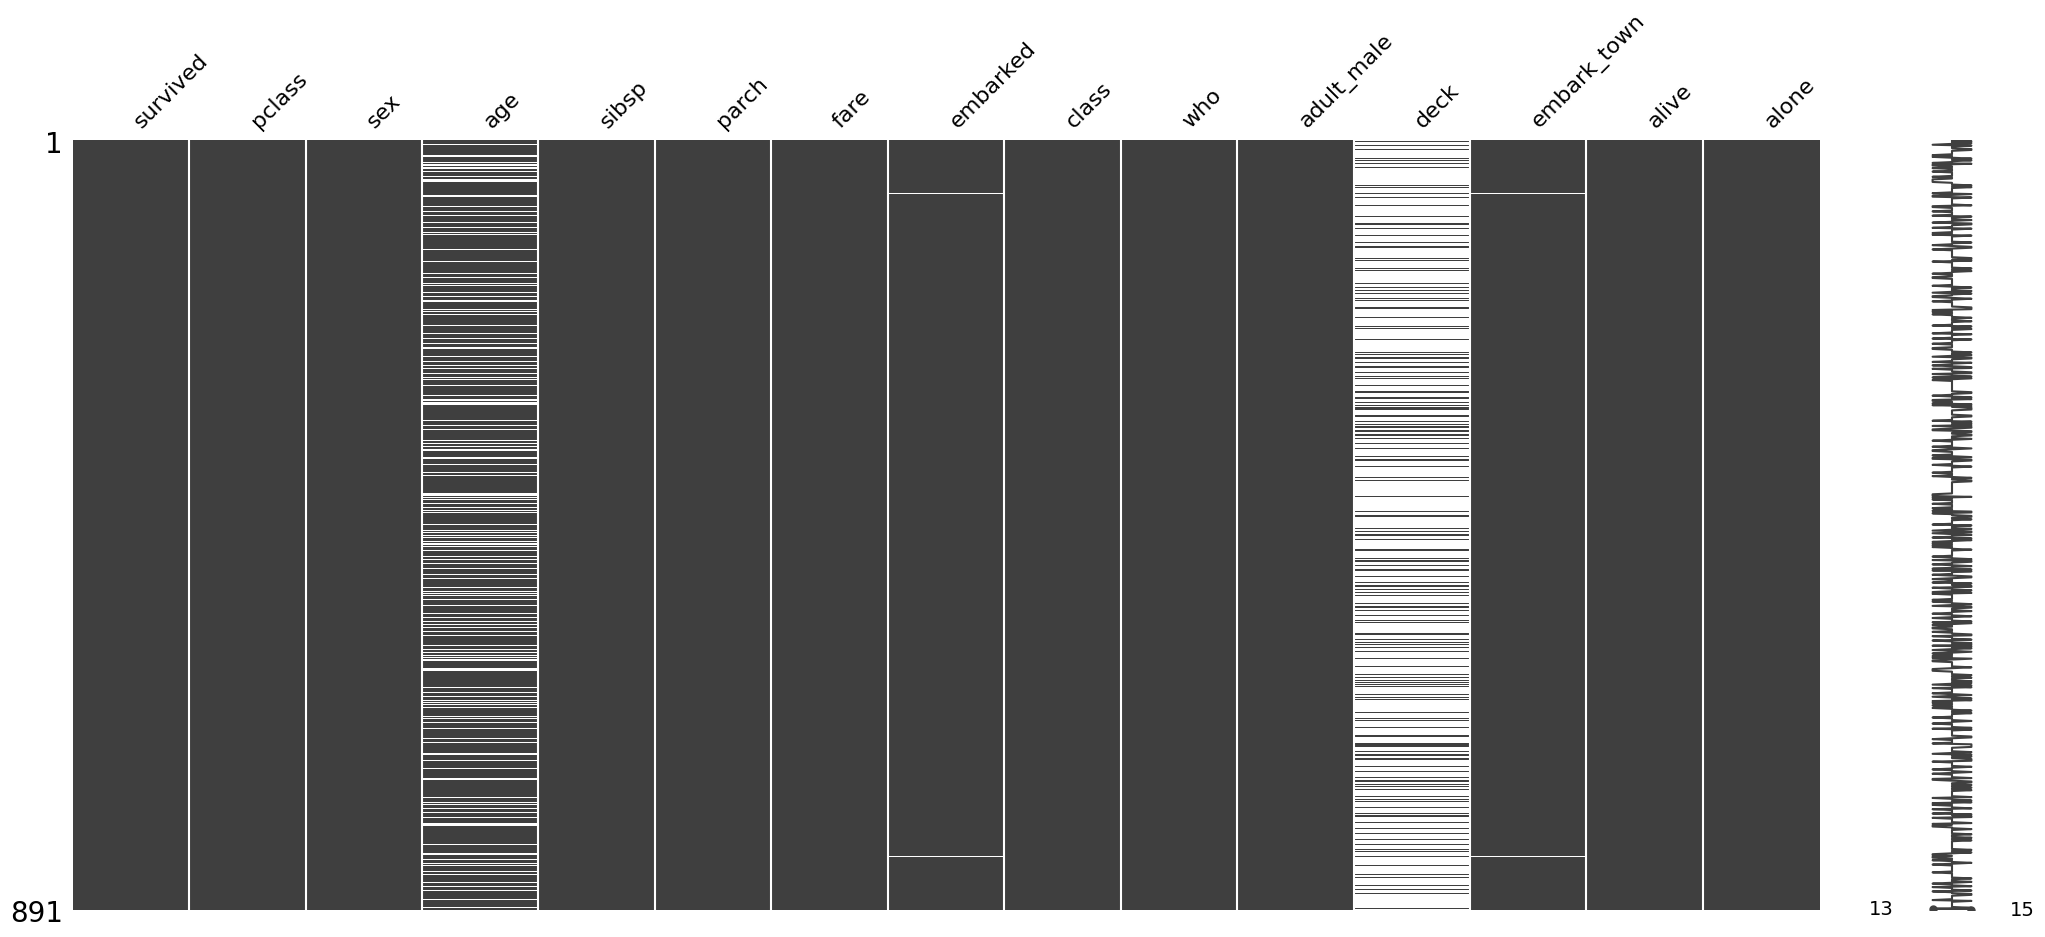

In [57]:
tdf = sns.load_dataset("titanic")
msno.matrix(tdf)

In [59]:
tdf2 = tdf.sample(20)
tdf2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
49,0,3,female,18.0,1,0,17.8000,S,Third,woman,False,NaN,Southampton,no,False
195,1,1,female,58.0,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
274,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
256,1,1,female,NaN,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True
497,0,3,male,NaN,0,0,15.1000,S,Third,man,True,NaN,Southampton,no,True
201,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
187,1,1,male,45.0,0,0,26.5500,S,First,man,True,NaN,Southampton,yes,True
214,0,3,male,NaN,1,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,False
37,0,3,male,21.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

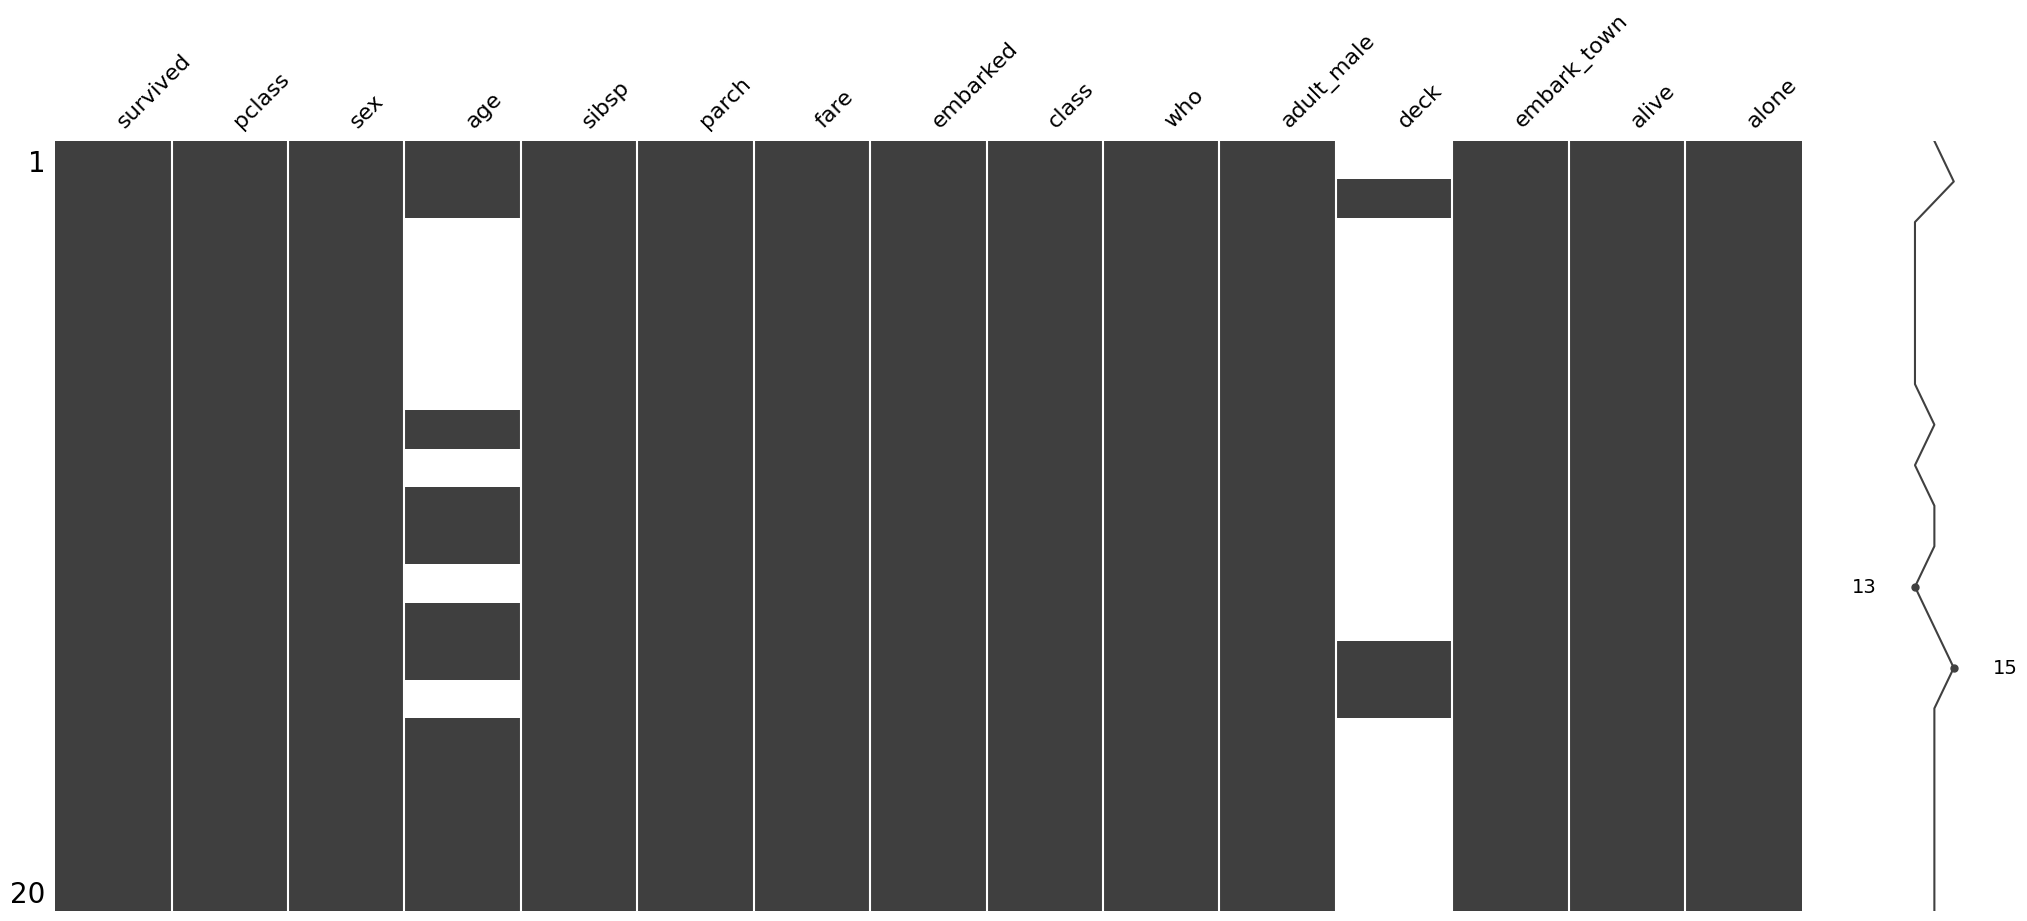

In [60]:
msno.matrix(tdf2)

- 오른쪽 스파크라인은 데이터 완성도의 일반적인 모양을 요약하고 데이터 세이트에서 최대 및 최소 널링이 있는 행을 가르킵니다.
  - 행마다 15개 중 NaN이 아닌 유효한 데이터의 개수를 나타내고
  - 그 점을 다음 행과 연결한 선

In [65]:
# 열 embarked가 NaN인 행 추출
tdf[tdf.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [73]:
# 두 열, age, deck이 모두 NaN인 행 추출
tdf[(tdf.embarked.isna()) & (tdf.age.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [70]:
# 세 개 열, age, deck, embark_town이 모두 NaN인 행 추출
tdf[tdf.age.isna() & tdf.deck.isna() & tdf.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [72]:
# 최소한 1개의 NaN에 있는 행 추출

tdf[tdf.isna().any()]

<ipython-input-72-1d830194633a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tdf[tdf.isna().any()]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

#### 결측치 제거하기

In [74]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,5.0
4,F,NaN


In [75]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,5.0


In [76]:
df.dropna(subset=['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,5.0


In [77]:
df_nomiss = df.dropna(subset=['score']) # scroe 결측치 제거된 데이터 만들기
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,5.0


In [79]:
df_nomiss['score']  + 1 # score로 연산

0    6.0
1    5.0
2    4.0
3    6.0
Name: score, dtype: float64

In [82]:
# 행 2에 NaN이 있으면 열을 제거
df.dropna(subset=[2], axis=1)

,score
0,5.0
1,4.0
2,3.0
3,5.0
4,NaN


In [83]:
# 행 3에 NaN이 있으면 열을 제거
df.dropna(subset=[3], axis=1)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,5.0
4,F,NaN


In [84]:
# 행 4에 NaN이 있으면 열을 제거
df.dropna(subset=[4], axis=1)

,sex
0,M
1,F
2,NaN
3,M
4,F


In [85]:
# 행 4에 NaN이 있으면 열을 제거
df.dropna(axis=1)

""
0
1
2
3
4


In [86]:
df.dropna(axis=1).empty

True

In [87]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,5.0
4,F,NaN


In [88]:
df['score'].mean() # 결측값은 제거(무시)하고 계산

4.25

In [90]:
df['score'].sum()  # 결측값은 제거(무시)하고 계산

17.0

In [92]:
# 결측값은 제거(무시)하고 계산
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,5.0,10.0


#### pandas 문서

In [94]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.NaN],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT, pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [95]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True
3,True,True,True


In [96]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [97]:
df.dropna(axis='columns')

""
0
1
2
3


In [99]:
# 모든 값이 nan인 경우, 행 제거
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [101]:
df.dropna(how='any') # 하나라도 nan인 경우, 행 제거

,name,toy,born
1,Batman,Batmobile,1940-04-25


#### 결측치 대체하기

In [103]:
exam = pd.read_csv('data/exam.csv') # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [104]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [105]:
exam['math'].mean()

55.23529411764706

#### 결측값 채워넣기 fillna()

In [106]:
exam['math'] = exam['math'].fillna(100) # math가 NaN이면 55로 대체
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,100.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,100.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [110]:
pd.set_option('display.precision', 3)
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [111]:
pd.set_option('display.precision', 3)
exam['math'] = exam['math'].fillna(exam['math'].mean()) # math가 NaN이면 55로 대체
exam

,id,nclass,math,english,science
0,1,1,50.000,98,50
1,2,1,60.000,97,60
2,3,1,55.235,86,78
3,4,1,30.000,98,58
4,5,2,25.000,80,65
5,6,2,50.000,89,98
6,7,2,80.000,90,45
7,8,2,55.235,78,25
8,9,3,20.000,98,15
9,10,3,50.000,98,45


# 07-2 이상한 데이터를 찾아라! - 이상치 정제하기

In [113]:
df = pd.DataFrame({
    'sex': [1, 2, 1, 3, 2, 1],
    'score': [5, 4, 3, 4, 2, 6]
})

df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [114]:
df['sex'].value_counts()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [115]:
df['score'].value_counts()

score
4    2
5    1
3    1
2    1
6    1
Name: count, dtype: int64

In [116]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [117]:
# score가 5보다 크면 Nan 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [118]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [119]:
df.dropna().groupby('sex').agg(mean_score=('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [120]:
df = pd.DataFrame({
    'x1': [1, 1, 2, 2]
})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan) # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [123]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [124]:
df = pd.DataFrame({ 'x1': [1, 1, 2, 2] })
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [125]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


#### 이상치 제거하기 - 극단적인 값

In [126]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
189,toyota,camry solara,2.4,2008,4,auto(s5),f,22,31,r,compact
219,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
173,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv
57,dodge,durango 4wd,3.9,1999,6,auto(l4),4,13,17,r,suv


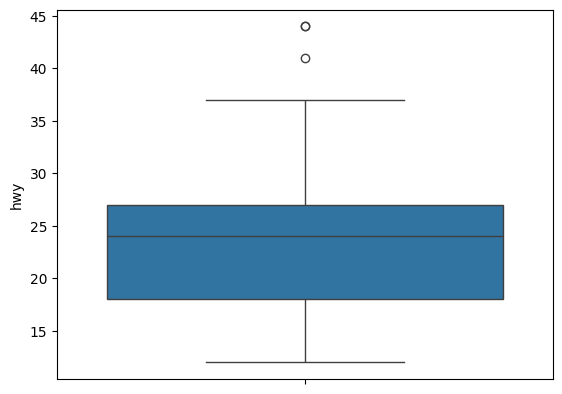

In [127]:
sns.boxplot(data=mpg, y='hwy');

In [128]:
mpg.hwy.describe()

count    234.000
mean      23.440
std        5.955
min       12.000
25%       18.000
50%       24.000
75%       27.000
max       44.000
Name: hwy, dtype: float64

In [129]:
s = pd.Series([1, 2, 3, 4, 5])

In [130]:
s.quantile([.25, .5, .75])

0.25    2.0
0.50    3.0
0.75    4.0
dtype: float64

In [132]:
pct25, pct75 = mpg['hwy'].quantile([.25, .75])

In [133]:
pct25

18.0

In [134]:
pct75

27.0

#### IQR(Interquartile range) 구하기

In [135]:
iqr = pct75 - pct25
iqr

9.0

#### 하한, 상한 구하기 (시험문제 아님, 알아두면 좋을것 같아서)

In [136]:
pct25 - 1.5 * iqr # 하한

4.5

In [137]:
pct75 + 1.5 * iqr # 상한

40.5

In [138]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

In [139]:
sns.matrix(mpg)

TypeError: 'module' object is not callable

### 3. 이상값을 결측 처리하기

In [149]:
# 4.5 - 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [150]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg) # 행수

231

In [153]:
dmpg.shape

(231, 11)

In [154]:
dmpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.175
f,27.728
r,21.000


In [155]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.175
f,27.728
r,21.000


In [156]:
mpg = pd.read_csv("data/mpg.csv")
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.175
f,28.160
r,21.000


In [151]:
dmpg.shape[0] # 행 수
dmpg.shape[1] # 열 수

11

# 정리하기

In [ ]:
## 1. 결측치 정제하기
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
pd.isna(df).sum()                                 # 결측치 확인
df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거


## 2. 이상치 정제하기

# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
pct25 - 1.5 * iqr                 # 하한
pct75 + 1.5 * iqr                 # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])